# Juntando R y Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2 # Descargué la extensión y la installe en downloads. https://www.lfd.uci.edu/~gohlke/pythonlibs/#rpy2
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri 

In [2]:
?ro

In [3]:
dir(rpy2)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_vector__',
 'rinterface',
 'rlike',
 'robjects',
 'situation']

In [4]:
rpy2.robjects.numpy2ri.activate() #Para activar la conversión de objetos

In [5]:
codigo_r = """
Saludar <- function(cadena){
 return (paste("Hola, ", cadena))
}"""

In [6]:
ro.r(codigo_r) # Generas una variable Global

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x0000012951ABDE48 / R:0x0000012954DB6F98>

In [7]:
saludar_py = ro.globalenv["Saludar"] # LE PASAS EL NOMBRE DE LA FUNCIÓN

In [8]:
saludar_py("Axel Munguía")

"'Hola, Axel Munguía'"


In [9]:
sal = saludar_py("Axel Munguía")
sal[0]

'Hola,  Axel Munguía'

In [10]:
type(sal)

rpy2.robjects.vectors.StrVector

In [11]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [12]:
# Ahora de R a Python
var_from_python = ro.FloatVector(np.arange(1,5,0.1))
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [13]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [14]:
# Esto no e puede
#ro.r("var_from_python") pues no es una cadaena
ro.globalenv["var_to_r"] = var_from_python

In [15]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [16]:
ro.r("sum(var_to_r)")

array([118.])

In [17]:
ro.r("mean(var_to_r)")

array([2.95])

In [18]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [19]:
np.sum(var_from_python)

118.00000000000007

In [20]:
np.mean(var_from_python)

2.950000000000002

In [21]:
np.std(var_from_python)

1.1543396380615207

In [22]:
ro.r("summary(var_to_r)")
# El mínimo, el primer cuartil, la mediana y la media, el tercer cuartil y el máximo

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [23]:
ro.r('hist(var_to_r)')

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x0000012954D388C8 / R:0x00000129554FC618>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012954D546C8 / R:0x000001295383B268>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000012955475AC8 / R:0x00000129554D79F8>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012955475F08 / R:0x00000129554FCAE8>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012955476148 / R:0x00000129554FC848>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000012955476108 / R:0x00000129554D4018>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000012954D54E08 / R:0x0000012951D13E10>
[       1]

In [24]:
ro.r('hist(var_to_r, breaks = 4)')

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x000001295547A708 / R:0x000001295693DE58>
[IntVe..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000001295547AA88 / R:0x00000129569124F8>
[1, 2, 3, 4, 5]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000001295547ACC8 / R:0x0000012956942338>
[11, 10, 10, 9]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001295547AAC8 / R:0x0000012956912188>
[0.275000, 0.250000, 0.250000, 0.225000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001295547B188 / R:0x0000012956911FF8>
[1.500000, 2.500000, 3.500000, 4.500000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001295547B388 / R:0x000001295693A210>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000001295547B5C8 / R:0x0000012951D13E10>
[       1]

## Trabajar de manera conjunta entre R y Python

In [25]:
import rpy2
import os
from rpy2.robjects.packages import importr
os.environ['R_USER'] = 'C:/Users/sacel/Anaconda/Lib/site-packages/rpy2'
from rpy2.robjects.packages import importr
base = importr('base')
print(base.R_home())
print(base._libPaths()[0])

[1] "c:/program files/r/r-3.5.3"

c:/program files/R/r-3.5.3/library


In [26]:
Lmoments = importr("Lmoments", lib_loc ="C:/Users/sacel/Documents/R/win-library/3.5")
distillery = importr("distillery", lib_loc ="C:/Users/sacel/Documents/R/win-library/3.5")
extremes = importr("extRemes", lib_loc ="C:/Users/sacel/Documents/R/win-library/3.5") # Para cargarlo necesitaba de otros 2 paquetes

In [27]:
fevd = extremes.fevd

In [28]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x00000129573374B0 / R:0x0000012957274FC0>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [29]:
data = pd.read_csv("../datasets/time/time_series.txt", delim_whitespace=True,
                   names = ["date","time","wind_speed"],parse_dates=[[0,1]],
                   index_col = 0, skiprows=1)
data

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9
...,...
2014-05-31 19:00:00,6.9
2014-05-31 20:00:00,6.5
2014-05-31 21:00:00,6.2


In [30]:
pd.Grouper(freq = "A") # Hay muchos tipos para ordenar , A = mean

TimeGrouper(freq=<YearEnd: month=12>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

In [31]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq = "A")).max()
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

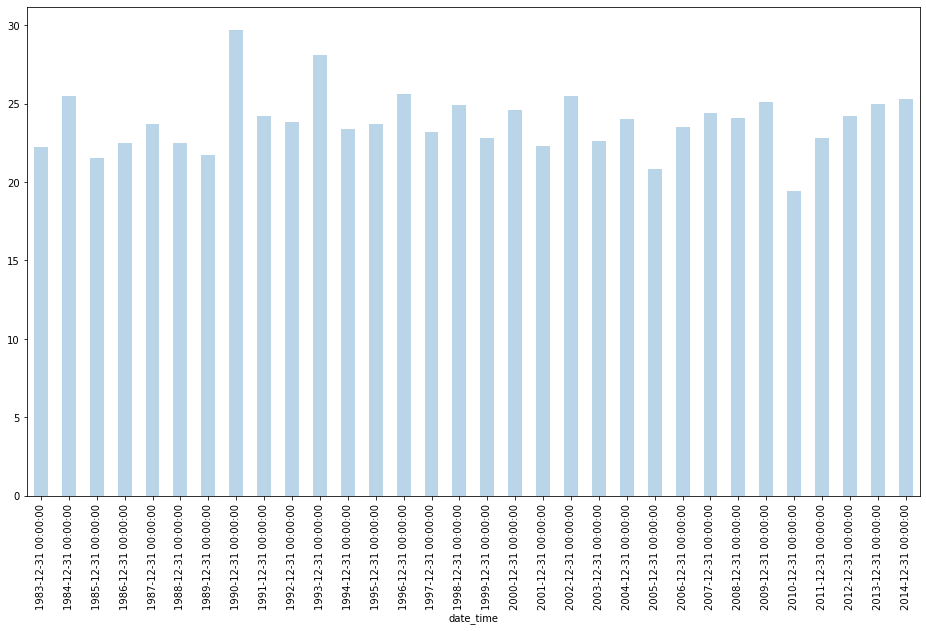

In [32]:
max_ws.plot(kind = "bar", figsize = (16,9), alpha = 0.3)
plt.show()

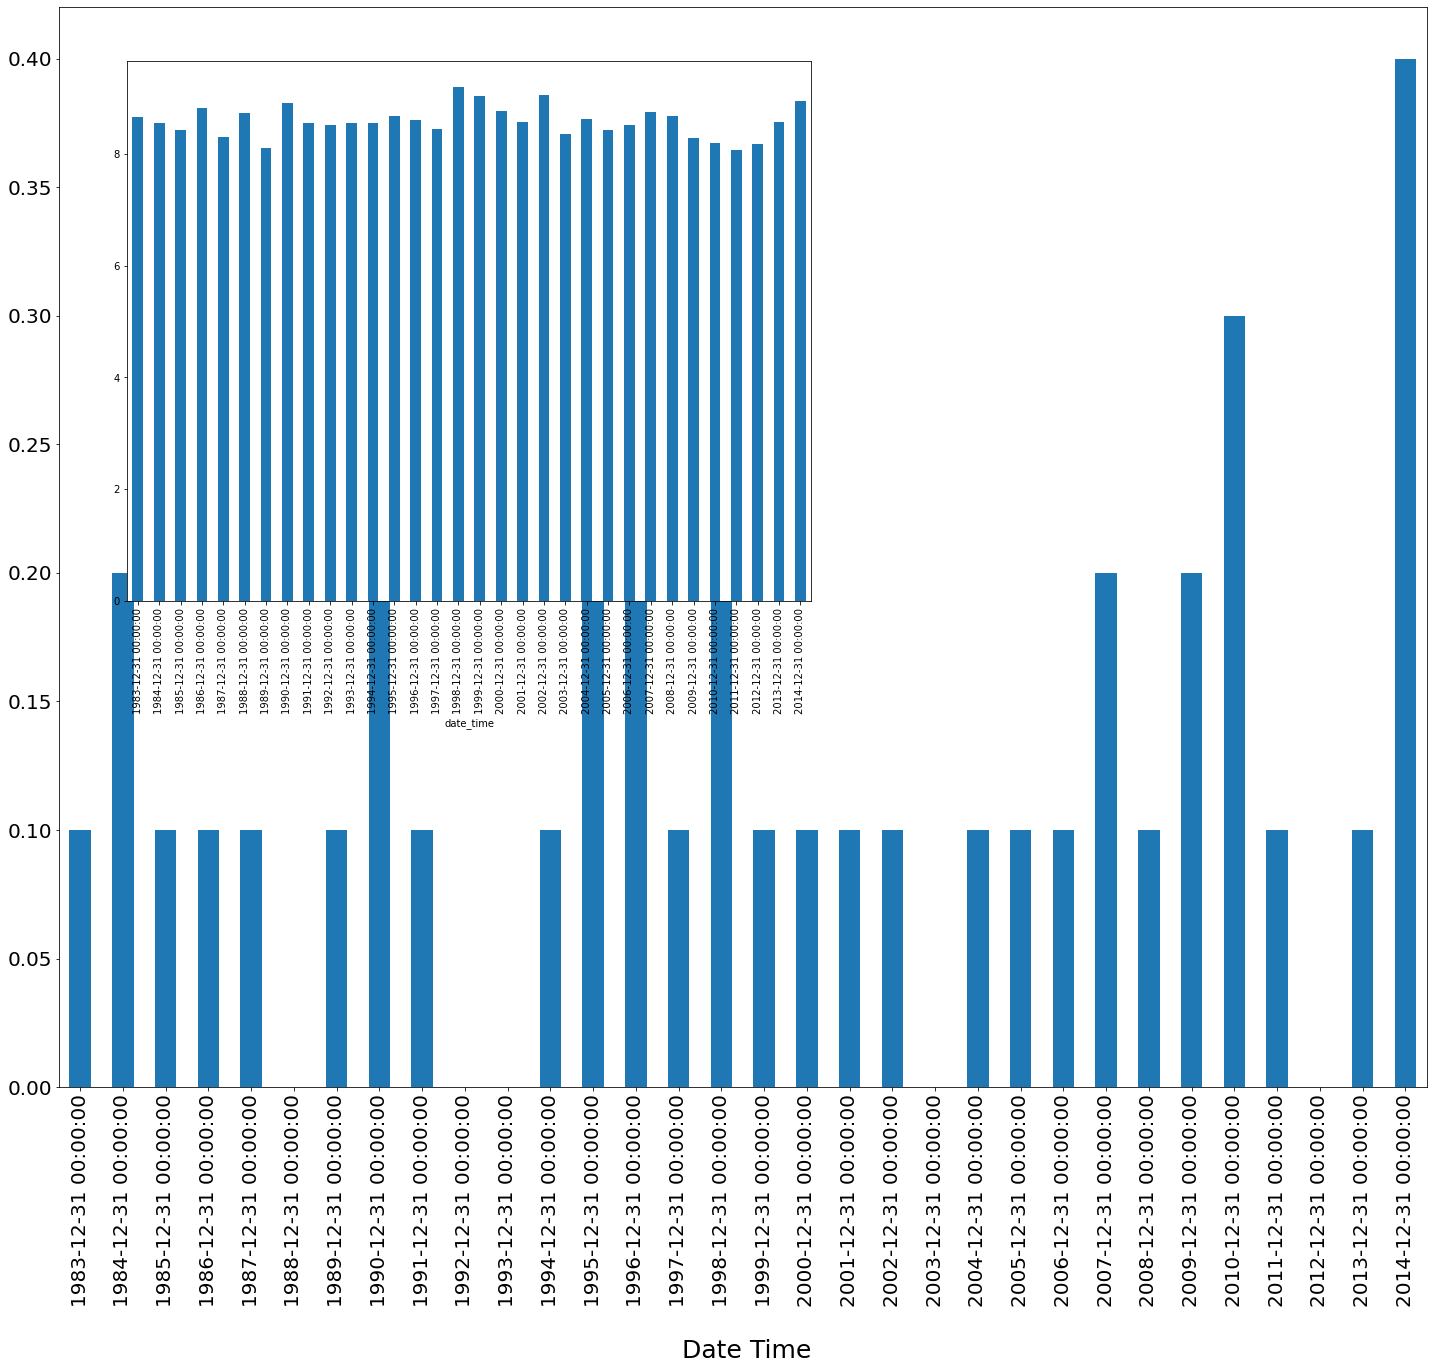

In [33]:
max_ws0 = data.wind_speed.groupby(pd.Grouper(freq = "A")).min()
max_ws1 = data.wind_speed.groupby(pd.Grouper(freq = "A")).mean()
fig = plt.figure(figsize = (19,15))
trace = fig.add_axes([0,1,1,1])
trace1 = fig.add_axes([0.05,1.45,.5,.5])
max_ws1.plot(kind = "bar", ax = trace1)
max_ws0.plot(kind = "bar", ax = trace)
trace.tick_params(labelsize = 20)
trace.set_xlabel("\n Date Time", size = 25)
plt.show()

In [34]:
# GMLE = Generalized Maximum Likelihood Estimation
result = fevd(max_ws.values, type = "GEV",method = "GMLE")

In [35]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [36]:
result.r_repr()

'structure(list(call = (function (x, data, threshold = NULL, threshold.fun = ~1, \n    location.fun = ~1, scale.fun = ~1, shape.fun = ~1, use.phi = FALSE, \n    type = c("GEV", "GP", "PP", "Gumbel", "Exponential"), method = c("MLE", \n        "GMLE", "Bayesian", "Lmoments"), initial = NULL, span, \n    units = NULL, time.units = "days", period.basis = "year", \n    na.action = na.fail, optim.args = NULL, priorFun = NULL, \n    priorParams = NULL, proposalFun = NULL, proposalParams = NULL, \n    iter = 9999, weights = 1, blocks = NULL, verbose = FALSE) \n{\n    if (verbose) \n        begin.tiid <- Sys.time()\n    out <- list()\n    inout <- list()\n    out$call <- match.call()\n    if (!missing(data)) {\n        out$data.name <- c(deparse(substitute(x)), deparse(substitute(data)))\n    }\n    else {\n        out$data.name <- c(deparse(substitute(x)), "")\n    }\n    type <- match.arg(type)\n    method <- match.arg(method)\n    out$weights <- weights\n    if (!missing(data)) {\n        i

In [37]:
print(result)



(function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1, 

    scale.fun = ~1, shape.fun = ~1, use.phi = FALSE, type = c("GEV", 

        "GP", "PP", "Gumbel", "Exponential"), method = c("MLE", 

        "GMLE", "Bayesian", "Lmoments"), initial = NULL, span, 

    units = NULL, time.units = "days", period.basis = "year", 

    na.action = na.fail, optim.args = NULL, priorFun = NULL, 

    priorParams = NULL, proposalFun = NULL, proposalParams = NULL, 

    iter = 9999, weights = 1, blocks = NULL, verbose = FALSE) 

{

    if (verbose) 

        begin.tiid <- Sys.time()

    out <- list()

    inout <- list()

    out$call <- match.call()

    if (!missing(data)) {

        out$data.name <- c(deparse(substitute(x)), deparse(substitute(data)))

    }

    else {

        out$data.name <- c(deparse(substitute(x)), "")

    }

    type <- match.arg(type)

    method <- match.arg(method)

    out$weights <- weights

    if (!missing(data)) {

        if (is.element(out

In [38]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [39]:
res = result.rx("results") # Consultarlo

In [40]:
res

R object with classes: ('list',) mapped to:
<ListVector - Python:0x0000012959F11908 / R:0x00000129580977D8>
[ListVector]
R object with classes: ('list',) mapped to:
<ListVector - Python:0x0000012959F11908 / R:0x00000129580977D8>
[ListVector]

In [41]:
loc, scale, shape = res[0].rx("par")[0]

In [42]:
loc, scale, shape 

(23.063941519915588, 1.7576912874286317, -0.1628816367714792)

### Función Mágica para R

In [43]:
import pip

In [44]:
%load_ext rpy2.ipython

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [45]:
help(rpy2.ipython.rmagic.RMagics.R)  # Execute code in R, optionally returning results to the Python runtime.

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [46]:
%R X = c(1,4,5,7); a = sd(X); mean(X)
%R a

array([2.5])

In [47]:
%%R 
X = c(1,4,5,7)
Y = c(2,4,3,9)
lm = lm(Y~X)
a = summary(lm)

In [48]:
%R print(a)

R object with classes: ('summary.lm',) mapped to:
<ListVector - Python:0x0000012959FB7F48 / R:0x00000129584626E8>
[Vector, Formula, FloatVector, Matrix, ..., FloatVector, FloatVector, FloatVector, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x0000012959F89C08 / R:0x0000012957878BE8>
[RObject, Vector]
  terms: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x0000012959FB8EC8 / R:0x00000129578B4B50>
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FC2F08 / R:0x00000129596B76E0>
[0.880000, -0.240000, -2.280000, 1.640000]
  coefficients: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x0000012959FBF788 / R:0x0000012958ABE0B8>
[0.080000, 1.040000, 2.300029, 0.482217, 0.034782, 2.156705, 0.975413, 0.163752]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FCB348 / R:0x00000129581D2778>
[0.699310]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FCB208 / R:0x00000129581D2740>
[0.548966]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FCB388 / R:0x0000012959230810>
[4.651376, 1.000000, 2.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x0000012959FCB9C8 / R:0x0000012959230770>
[1.213333, -0.226667, -0.226667, 0.053333]

In [49]:
%R X = c(1,4,5,7); Y = c(2,4,3,9); lm = lm(Y~X)

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x0000012959FB8108 / R:0x00000129592645F8>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FB2E88 / R:0x0000012957FE72F8>
[0.080000, 1.040000]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FC2E88 / R:0x00000129592623C8>
[0.880000, -0.240000, -2.280000, 1.640000]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FBBEC8 / R:0x0000012959262378>
[-9.000000, -4.503332, -2.383969, 1.742611]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000012959FBBE88 / R:0x00000129584327E8>
[2]
...
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x0000012959FB8108 / R:0x00000129592645F8>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  qr: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x0000012959FBF588 / R:0x0000012957A6CD70>
[RObject, Vector]
  df.residual: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x0000012959FB2C48 / R:0x0000012957A87AA0>
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x0000012959FB8108 / R:0x00000129592645F8>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]

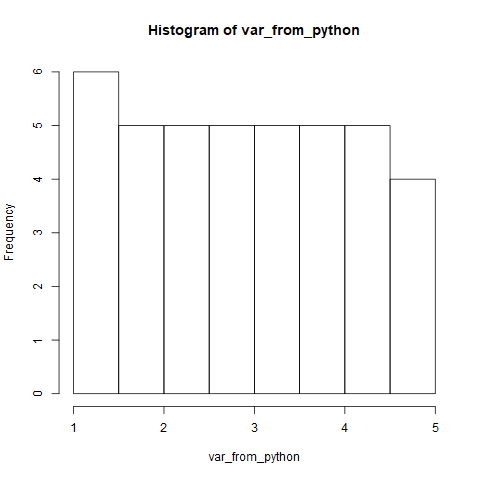

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x0000012954D4C588 / R:0x000001295954E718>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FBFC88 / R:0x00000129592629C8>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000012959FD0DC8 / R:0x0000012958E03488>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959F94108 / R:0x000001295943D068>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000012959FB8708 / R:0x000001295943C1F8>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000012959FB8308 / R:0x000001295851E7F0>
['var_from_python']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000012959FB24C8 / R:0x0000012951D13E10>
[       1]

In [50]:
%R -i var_from_python hist(var_from_python)

## Ejemplo más complejo de R, Python y RMagic

Tipo de Ajuste: GEV
Tipo de Método: MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







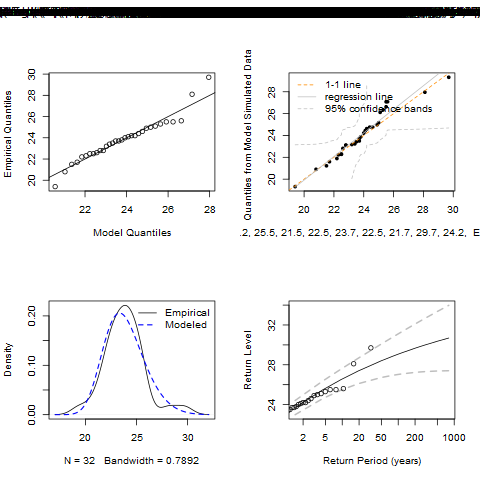

Tipo de Ajuste: GEV
Tipo de Método: GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







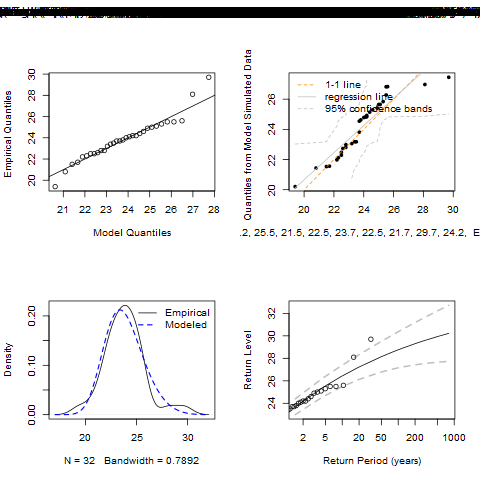

Tipo de Ajuste: Gumbel
Tipo de Método: MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







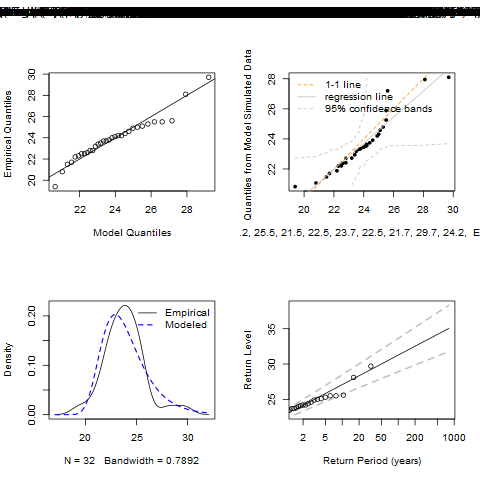

Tipo de Ajuste: Gumbel
Tipo de Método: GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







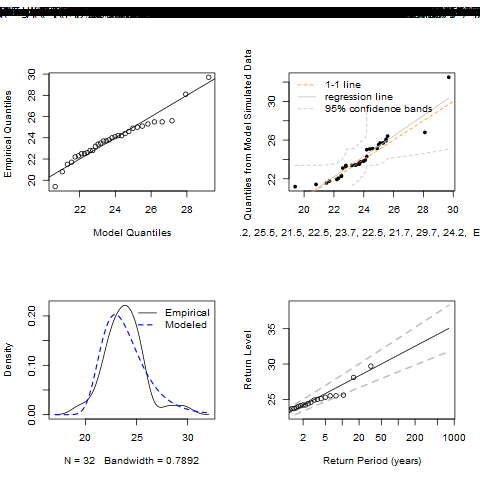

In [51]:
method = ["MLE","GMLE"]
tipos = ["GEV","Gumbel"]

for i in tipos:
    for m in method:
        print(f"Tipo de Ajuste: {i}")
        print(f"Tipo de Método: {m}")
        result = fevd(max_ws.values, method = m, type = i)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)